# Yoga pose detection with computer vision

## Mediapipe pose detection

In [3]:
import cv2
import mediapipe as mp
import numpy as np
from matplotlib import pyplot as plt
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

### Static images

(-0.5, 639.5, 359.5, -0.5)

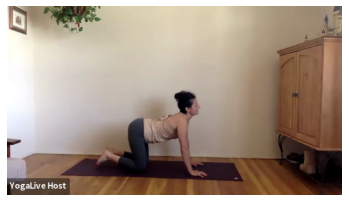

In [4]:
test_image=cv2.imread("DATA/training data/training frames/Bitilasana - cow pose/out1106.png")
test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(test_image)
plt.axis("off")

CPU times: user 273 ms, sys: 206 ms, total: 480 ms
Wall time: 369 ms


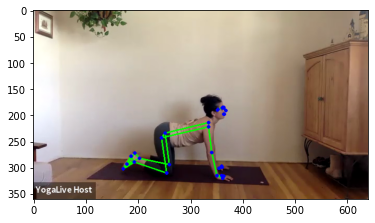

In [5]:
%%time
with mp_pose.Pose(
    static_image_mode=True, model_complexity=2, min_detection_confidence=0.5
) as pose:
    image_height, image_width, _ = test_image.shape
    results = pose.process(test_image)

    # Draw pose landmarks on the image.
    annotated_image = test_image.copy()
    mp_drawing.draw_landmarks(
        annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS
    )
    plt.imshow(annotated_image)

### Plotting in 3D

In [6]:
%matplotlib inline

In [7]:
X=np.array([m.x for m in results.pose_landmarks.landmark])
Y=np.array([m.y for m in results.pose_landmarks.landmark])
Z=np.array([m.z for m in results.pose_landmarks.landmark])

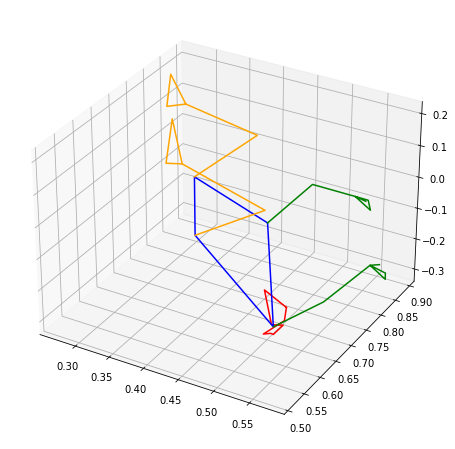

In [8]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(projection='3d')
head=[9,10,8,6,5,4,0,1,2,3,7,9]
ax.plot(X[head],Y[head],Z[head], color="r") # head
body=[11,12,24,23,11]
ax.plot(X[body],Y[body],Z[body], color="b") # body
leg_l=[24,26,28,32,30,28]
leg_r=[23,25,27,29,31,27]
ax.plot(X[leg_l],Y[leg_l],Z[leg_l], color="orange")
ax.plot(X[leg_r],Y[leg_r],Z[leg_r], color="orange")
arm_l=[12,14,16,18,20,16,22]
arm_r=[11,13,15,17,19,15,21]
ax.plot(X[arm_l],Y[arm_l],Z[arm_l], color="green")
ax.plot(X[arm_r],Y[arm_r],Z[arm_r], color="green")
plt.show()

In [15]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Scatter3d(
    x=X[body], y=Y[body], z=Z[body]
),color="blue")
fig.show()

TypeError: invalid Figure property: color
color
Bad property path:
color
^^^^^

In [11]:
import plotly.express as px
fig = px.line_3d(X[body], Y[body], Z[body], color="blue")
fig.show()

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of [0] but received: blue

## Normalizing body position


## What is the data
lines

In [9]:
results.pose_landmarks

landmark {
  x: 0.5755260586738586
  y: 0.5320345759391785
  z: -0.12208478152751923
  visibility: 0.9999805688858032
}
landmark {
  x: 0.5695677399635315
  y: 0.5166510343551636
  z: -0.1095825657248497
  visibility: 0.999984860420227
}
landmark {
  x: 0.5679576396942139
  y: 0.5164777040481567
  z: -0.10959843546152115
  visibility: 0.999982476234436
}
landmark {
  x: 0.5666808485984802
  y: 0.516411304473877
  z: -0.10965937376022339
  visibility: 0.9999901056289673
}
landmark {
  x: 0.5687834024429321
  y: 0.517622709274292
  z: -0.14111775159835815
  visibility: 0.9999874830245972
}
landmark {
  x: 0.5667934417724609
  y: 0.5182034373283386
  z: -0.1410893052816391
  visibility: 0.9999831914901733
}
landmark {
  x: 0.5649049282073975
  y: 0.5184091329574585
  z: -0.14107629656791687
  visibility: 0.9999823570251465
}
landmark {
  x: 0.5528901219367981
  y: 0.5252702832221985
  z: -0.022930670529603958
  visibility: 0.9999855756759644
}
landmark {
  x: 0.5500767230987549
  y: 0.529

## Test trained model

In [2]:
import pickle

with open("model.sav", "rb") as f:
    model=pickle.load(f)

type(model)

dict

In [21]:
model=[*model.values()][0]

In [23]:
from preprocessing import extract_features

In [27]:
feautures=extract_features(results.pose_landmarks)

In [28]:
feautures

{'Nose_CenterShoulders_CenterHips': 151.47383469475992,
 'LeftHip_LeftShoulder_LeftElbow': 68.17673434855853,
 'RightHip_RightShoulder_RightElbow': 90.40851270679215,
 'LeftShoulder_LeftElbow_LeftWrist': 128.0243073866346,
 'RightShoulder_RightElbow_RightWrist': 152.85058054995054,
 'LeftShoulder_CenterShoulders_Nose': 113.66353235072346,
 'RightShoulder_CenterShoulders_Nose': 66.33646764927656,
 'LeftIndex1_LeftWrist_LeftElbow': 145.17605886814917,
 'RightIndex1_RightWrist_RightElbow': 101.19765445242668,
 'LeftShoulder_LeftHip_LeftKnee': 109.49390570765466,
 'RightShoulder_RightHip_RightKnee': 86.91735989692164,
 'LeftHip_LeftKnee_LeftAnkle': 69.64313880346934,
 'RightHip_RightKnee_RightAnkle': 50.4024057016037,
 'LeftKnee_LeftAnkle_LeftFootIndex': 135.30709672246718,
 'RightKnee_RightAnkle_RightFootIndex': 138.64883176187507,
 'LeftElbow_CenterShoulders_RightElbow': 113.09679598051213,
 'LeftKnee_CenterHips_RightKnee': 76.15961737662805}

In [39]:
ft=np.atleast_2d([*feautures.values()])
ft

array([[151.47383469,  68.17673435,  90.40851271, 128.02430739,
        152.85058055, 113.66353235,  66.33646765, 145.17605887,
        101.19765445, 109.49390571,  86.9173599 ,  69.6431388 ,
         50.4024057 , 135.30709672, 138.64883176, 113.09679598,
         76.15961738]])

In [41]:
model.predict_proba(ft)

array([[0.02, 0.  , 0.  , 0.02, 0.05, 0.  , 0.01, 0.  , 0.  , 0.38, 0.52,
        0.  ]])

In [42]:
model.classes_

array(["Child's pose", 'Cobra Pose', 'Downward-facing Dog', 'Easy Pose',
       'Half Splits Pose', "Happy Baby's pose", 'Low Lunge',
       'Standing Forward Bend', 'Upward-Facing Dog', 'cat pose',
       'cow pose', 'high plank'], dtype=object)

## Timeline from prediction in video

In [47]:
import pandas as pd
timeline=pd.read_csv("test_video_results.csv", index_col=0)

In [48]:
timeline

,time,Child's pose,Cobra Pose,Downward-facing Dog,Easy Pose,Half Splits Pose,Happy Baby's pose,Low Lunge,Standing Forward Bend,Upward-Facing Dog,cat pose,cow pose,high plank
0,0.48,0.03,0.17,0.23,0.11,0.09,0.04,0.04,0.13,0.06,0.01,0.02,0.07
1,0.96,0.03,0.05,0.56,0.17,0.01,0.01,0.03,0.06,0.04,0.00,0.01,0.03
2,1.44,0.01,0.04,0.60,0.20,0.01,0.01,0.05,0.04,0.04,0.00,0.00,0.00
3,1.92,0.02,0.04,0.59,0.20,0.01,0.01,0.05,0.04,0.04,0.00,0.00,0.00
4,2.40,0.02,0.04,0.53,0.18,0.01,0.01,0.04,0.08,0.05,0.00,0.01,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,58.08,0.09,0.00,0.01,0.24,0.22,0.21,0.01,0.12,0.01,0.04,0.05,0.00
121,58.56,0.27,0.00,0.13,0.15,0.20,0.08,0.00,0.08,0.00,0.02,0.06,0.01
122,59.04,0.23,0.00,0.09,0.17,0.21,0.10,0.03,0.07,0.00,0.03,0.06,0.01
123,59.52,0.21,0.00,0.06,0.17,0.23,0.13,0.02,0.06,0.00,0.03,0.08,0.01


In [55]:
import matplotlib.pyplot as plt

,Child's pose,Cobra Pose,Downward-facing Dog,Easy Pose,Half Splits Pose,Happy Baby's pose,Low Lunge,Standing Forward Bend,Upward-Facing Dog,cat pose,cow pose,high plank
0,0.03,0.17,0.23,0.11,0.09,0.04,0.04,0.13,0.06,0.01,0.02,0.07
1,0.03,0.05,0.56,0.17,0.01,0.01,0.03,0.06,0.04,0.00,0.01,0.03
2,0.01,0.04,0.60,0.20,0.01,0.01,0.05,0.04,0.04,0.00,0.00,0.00
3,0.02,0.04,0.59,0.20,0.01,0.01,0.05,0.04,0.04,0.00,0.00,0.00
4,0.02,0.04,0.53,0.18,0.01,0.01,0.04,0.08,0.05,0.00,0.01,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...
120,0.09,0.00,0.01,0.24,0.22,0.21,0.01,0.12,0.01,0.04,0.05,0.00
121,0.27,0.00,0.13,0.15,0.20,0.08,0.00,0.08,0.00,0.02,0.06,0.01
122,0.23,0.00,0.09,0.17,0.21,0.10,0.03,0.07,0.00,0.03,0.06,0.01
123,0.21,0.00,0.06,0.17,0.23,0.13,0.02,0.06,0.00,0.03,0.08,0.01


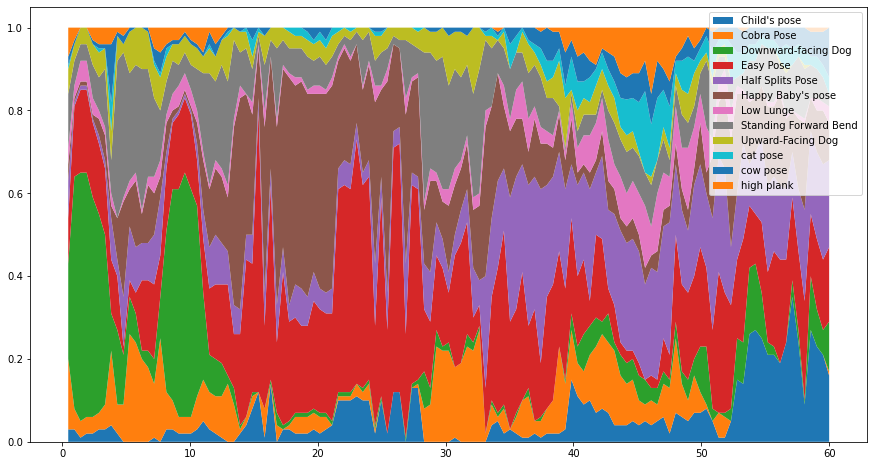

In [66]:
plt.figure(figsize=(15,8))
plt.stackplot(timeline["time"], timeline.iloc[:,1:].to_numpy().T, labels=model.classes_)

plt.legend()
plt.xlabel("time [s]")
plt.ylabel("Probability per pose")
plt.savefig("timeline.png")